In [1]:
import numpy as np
import pandas as pd

In [2]:
data_23 = pd.read_csv("data/0901_Tek023.csv")
data_24 = pd.read_csv("data/0901_Tek024.csv")
data_25 = pd.read_csv("data/0901_Tek025.csv")
data_31 = pd.read_csv("data/0901_Tek031.csv")

In [3]:
print(data_31)

             n  vth_average            t
0            0     0.897816      0.00000
1            1     1.026272      0.00001
2            2     1.048362      0.00002
3            4     1.071285      0.00004
4            8     1.100969      0.00008
5           16     1.123731      0.00016
6           32     1.141961      0.00032
7           64     1.158543      0.00064
8          128     1.183770      0.00128
9          256     1.201427      0.00256
10         512     1.221689      0.00512
11        1024     1.246545      0.01024
12        2048     1.267370      0.02048
13        4096     1.294843      0.04096
14        8192     1.316228      0.08192
15       16384     1.335845      0.16384
16       32768     1.353571      0.32768
17       65536     1.378966      0.65536
18      131072     1.398590      1.31072
19      262144     1.414390      2.62144
20      524288     1.427069      5.24288
21     1048576     1.446973     10.48576
22     2097152     1.461066     20.97152
23     4194304  

In [4]:
data_23.head()

,n,vth_average,t
0,0,0.914897,0.00000
1,1,1.012521,0.00001
2,2,1.030124,0.00002
3,4,1.053786,0.00004
4,8,1.073705,0.00008


In [5]:
# For example: use data driven LSTM ML to predict dynamic Vth at 10000s using just first 100s
# NEED EITHER: MORE TRIALS, less sparse time data for first 100s, or ideally both
# For the time being, test predict 10000 values on the first 10 values
first_100 = data_23[0:25]

/Users/titanjuels/Documents/HKUST/FYP/model/fypenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='t', ylabel='vth_average'>

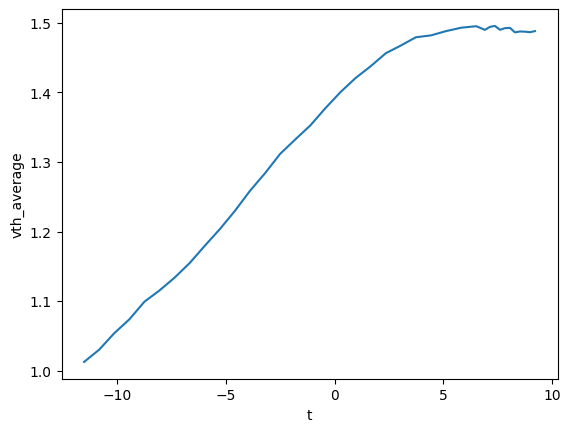

In [6]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

sns.lineplot(x=np.log(data_23["t"]), y=data_23["vth_average"])

In [7]:
epsilon = 1e-9
X_train = np.log(data_23["t"][0:25].values + epsilon).reshape(-1, 1)
y_train = data_23["vth_average"][0:25].values

X_test = np.log(data_23["t"][25:].values + epsilon).reshape(-1, 1)
y_test = data_23["vth_average"][25:].values

In [8]:
# Random Forest Regression

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Random Forest MSE: 0.00012881821492800793


In [9]:
# Neural Netwok

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_mlp_train = mlp.predict(X_train_scaled)

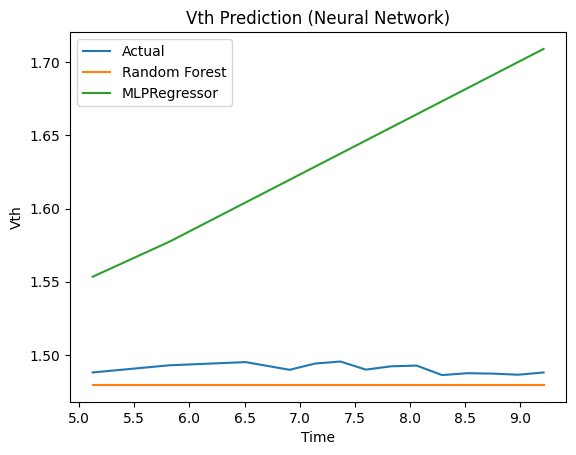

In [10]:
# Prediction Plots

import matplotlib.pyplot as plt

plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_rf, label="Random Forest")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_mlp, label="MLPRegressor")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("Vth Prediction (Neural Network)")
plt.show()

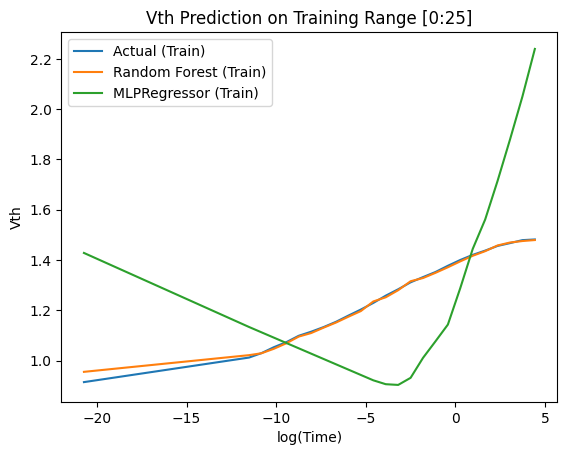

In [11]:
# Predict on training data
y_pred_rf_train = rf.predict(X_train)
y_pred_mlp_train = mlp.predict(X_train)

# Plot actual vs predicted for training range
import matplotlib.pyplot as plt

plt.plot(np.log(data_23["t"][0:25] + epsilon), y_train, label="Actual (Train)")
plt.plot(np.log(data_23["t"][0:25] + epsilon), y_pred_rf_train, label="Random Forest (Train)")
plt.plot(np.log(data_23["t"][0:25] + epsilon), y_pred_mlp_train, label="MLPRegressor (Train)")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction on Training Range [0:25]")
plt.show()

MLPRegressor (raw time) MSE: 0.9337977859204738


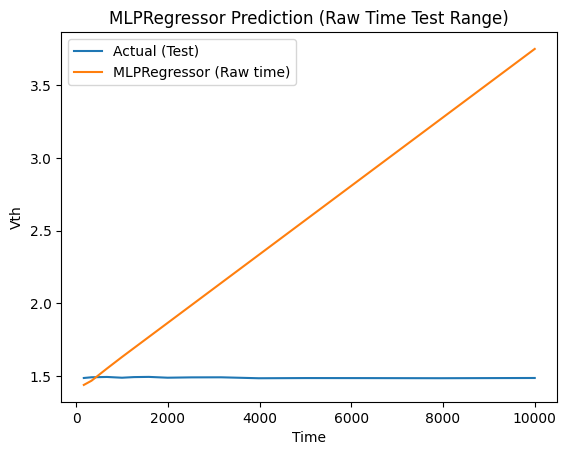

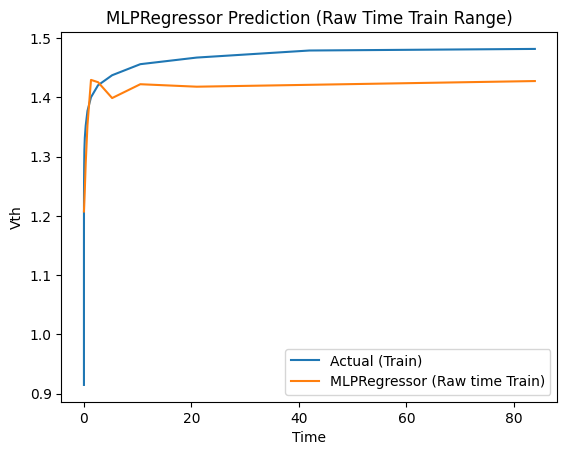

In [12]:
# Prepare train/test data using raw time (not log)
X_train_raw = data_23["t"][0:25].values.reshape(-1, 1)
X_test_raw = data_23["t"][25:].values.reshape(-1, 1)

# Train MLPRegressor on raw time
mlp_raw = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_raw.fit(X_train_raw, y_train)
y_pred_mlp_raw = mlp_raw.predict(X_test_raw)
y_pred_mlp_raw_train = mlp_raw.predict(X_train_raw)

print("MLPRegressor (raw time) MSE:", mean_squared_error(y_test, y_pred_mlp_raw))

# Plot predictions on test range
plt.plot(data_23["t"][25:], y_test, label="Actual (Test)")
plt.plot(data_23["t"][25:], y_pred_mlp_raw, label="MLPRegressor (Raw time)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("MLPRegressor Prediction (Raw Time Test Range)")
plt.show()

# Plot predictions on training range
plt.plot(data_23["t"][0:25], y_train, label="Actual (Train)")
plt.plot(data_23["t"][0:25], y_pred_mlp_raw_train, label="MLPRegressor (Raw time Train)")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Vth")
plt.title("MLPRegressor Prediction (Raw Time Train Range)")
plt.show()

# Training on first 1000s and predicting 10000s

Actual Vth at 10000s: 1.494168895
Random Forest predicted Vth at 10000s: 1.4908929725300002
MLPRegressor predicted Vth at 10000s: 1.5637338251914086


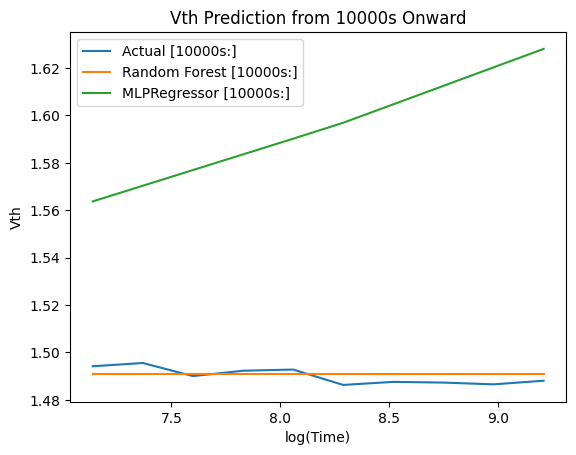

In [13]:
epsilon = 1e-9

# Prepare train data (first 1000s)
train_mask = data_23["t"] <= 1000
X_train_1000 = np.log(data_23["t"][train_mask].values + epsilon).reshape(-1, 1)
y_train_1000 = data_23["vth_average"][train_mask].values

# Prepare test data
# idx_10000 = (np.abs(data_23["t"] - 10000)).idxmin()
idx_10000 = 29
X_test_10000 = np.log(np.array([data_23["t"][idx_10000] + epsilon])).reshape(-1, 1)
y_test_10000 = np.array([data_23["vth_average"][idx_10000]])

X_test_10000plus = np.log(data_23["t"][idx_10000:].values + epsilon).reshape(-1, 1)
y_test_10000plus = data_23["vth_average"][idx_10000:].values

# Scaling
from sklearn.preprocessing import StandardScaler
scaler_1000 = StandardScaler()
X_train_1000_scaled = scaler_1000.fit_transform(X_train_1000)
X_test_10000_scaled = scaler_1000.transform(X_test_10000)
X_test_10000plus_scaled = scaler_1000.transform(X_test_10000plus)

# Train models
rf_1000 = RandomForestRegressor()
rf_1000.fit(X_train_1000, y_train_1000)
y_pred_rf_10000 = rf_1000.predict(X_test_10000)
y_pred_rf_10000plus = rf_1000.predict(X_test_10000plus)

mlp_1000 = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_1000.fit(X_train_1000_scaled, y_train_1000)
y_pred_mlp_10000 = mlp_1000.predict(X_test_10000_scaled)
y_pred_mlp_10000plus = mlp_1000.predict(X_test_10000plus_scaled)

# Print single value predictions
print("Actual Vth at 10000s:", y_test_10000[0])
print("Random Forest predicted Vth at 10000s:", y_pred_rf_10000[0])
print("MLPRegressor predicted Vth at 10000s:", y_pred_mlp_10000[0])

# Plot predictions vs actual for [idx_10000:] range
import matplotlib.pyplot as plt
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_test_10000plus, label="Actual [10000s:]")
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_pred_rf_10000plus, label="Random Forest [10000s:]")
plt.plot(np.log(data_23["t"][idx_10000:] + epsilon), y_pred_mlp_10000plus, label="MLPRegressor [10000s:]")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction from 10000s Onward")
plt.show()

## Measure MSE (Lower is better)

In [14]:
print("Random Forest MSE ([25:]):", mean_squared_error(y_test, y_pred_rf))
print("MLPRegressor MSE ([25:]):", mean_squared_error(y_test, y_pred_mlp))
print("MLPRegressor (raw time) MSE ([25:]):", mean_squared_error(y_test, y_pred_mlp_raw))

Random Forest MSE ([25:]): 0.00012881821492800793
MLPRegressor MSE ([25:]): 0.026246530055570906
MLPRegressor (raw time) MSE ([25:]): 0.9337977859204738


In [15]:
print("Random Forest MSE (train [0:25]):", mean_squared_error(y_train, y_pred_rf_train))
print("MLPRegressor MSE (train [0:25]):", mean_squared_error(y_train, y_pred_mlp_train))
print("MLPRegressor (raw time) MSE (train [0:25]):", mean_squared_error(y_train, y_pred_mlp_raw_train))

Random Forest MSE (train [0:25]): 8.671707215423567e-05
MLPRegressor MSE (train [0:25]): 0.09440609693622637
MLPRegressor (raw time) MSE (train [0:25]): 0.010593336401465446


In [16]:
print("Random Forest MSE (10000s single value):", mean_squared_error(y_test_10000, y_pred_rf_10000))
print("MLPRegressor MSE (10000s single value):", mean_squared_error(y_test_10000, y_pred_mlp_10000))

Random Forest MSE (10000s single value): 1.0731668029449977e-05
MLPRegressor MSE (10000s single value): 0.004839279512535541


In [17]:
print("Random Forest MSE ([10000s:]):", mean_squared_error(y_test_10000plus, y_pred_rf_10000plus))
print("MLPRegressor MSE ([10000s:]):", mean_squared_error(y_test_10000plus, y_pred_mlp_10000plus))

Random Forest MSE ([10000s:]): 1.105300353247077e-05
MLPRegressor MSE ([10000s:]): 0.011493276887416377


# LSTM Model

Epoch 1/100


/Users/titanjuels/Documents/HKUST/FYP/model/fypenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4234
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4174
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4115
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4056
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3998
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3939
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3882
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3825
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3768
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3712
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3656
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3601
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3546
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3492
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3438
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

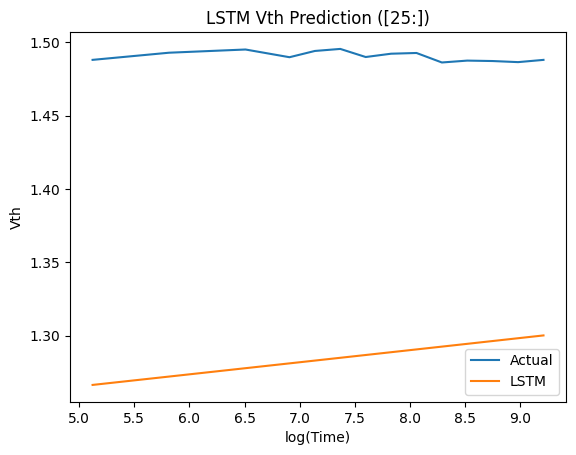

In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare train/test data (example: first 25 for train, rest for test)
epsilon = 1e-9
X_train = np.log(data_23["t"][0:25].values + epsilon).reshape(-1, 1)
y_train = data_23["vth_average"][0:25].values
X_test = np.log(data_23["t"][25:].values + epsilon).reshape(-1, 1)
y_test = data_23["vth_average"][25:].values

# Scale features for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential([
    LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train_lstm, y_train_scaled, epochs=100, verbose=1)

# Predict
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled)

# Measure MSE
from sklearn.metrics import mean_squared_error
print("LSTM MSE ([25:]):", mean_squared_error(y_test, y_pred_lstm))

# Plot
import matplotlib.pyplot as plt
plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_lstm, label="LSTM")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("LSTM Vth Prediction ([25:])")
plt.show()

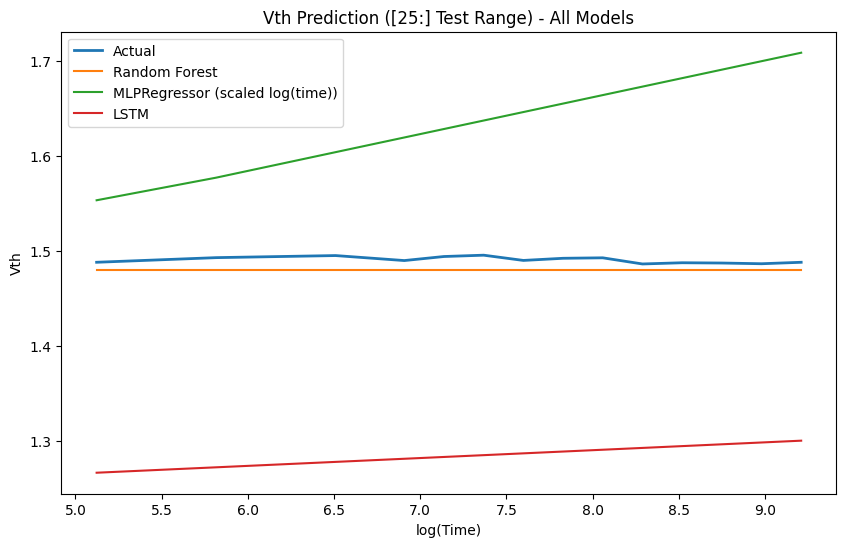

In [21]:
# now plot everything again
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(np.log(data_23["t"][25:] + epsilon), y_test, label="Actual", linewidth=2)
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_rf, label="Random Forest")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_mlp, label="MLPRegressor (scaled log(time))")
plt.plot(np.log(data_23["t"][25:] + epsilon), y_pred_lstm, label="LSTM")
plt.legend()
plt.xlabel("log(Time)")
plt.ylabel("Vth")
plt.title("Vth Prediction ([25:] Test Range) - All Models")
plt.show()